In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from sympy import *
import math

# Skalární součin

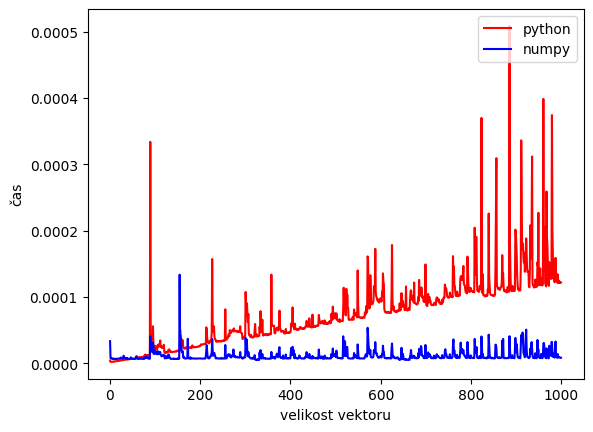

In [6]:
time_A = []
time_B = []

# velikost vekotru
for velikost in range(1, 1000):
    # 2 random vektory dané velikosti
    s1 = random.sample(range(-500, 500), velikost)
    s2 = random.sample(range(-500, 500), velikost)

    # skalární součin pomocí klasického pythonu
    start = perf_counter()
    dp = sum([s1[i] * s2[i] for i in range(len(s1))])
    end = perf_counter()
    time_A.append(end - start)
    
    # vektory na numpy pole
    np1 = np.array(s1)
    np2 = np.array(s2)

    # skalární součin pomocí numpy
    start = perf_counter()
    npdp = np.dot(np1, np2)
    end = perf_counter()
    time_B.append(end - start)

# vykreslení grafu závislosti času na velikosti vektoru
plt.plot(range(1, 1000), time_A, 'r', label = 'python')
plt.plot(range(1, 1000), time_B, 'b', label = 'numpy')
plt.legend(loc = 'upper right')
plt.xlabel('velikost vektoru')
plt.ylabel('čas')
plt.show()

# Maticový součin

In [60]:
# test výpočtu maticového součinu pomocí klasického pythonu
A = [[12, 7, 3],
    [4, 5, 6],
    [7, 8, 9]]
   
B = [[5, 8, 1],
    [6, 7, 3],
    [4, 5, 9]]
     
result = [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]
 
for radek in range(len(A)):
 
    for sloupek in range(len(B[0])):

        for i in range(len(B)):
            result[radek][sloupek] += A[radek][i] * B[i][sloupek]

 
print(result)


[[114, 160, 60], [74, 97, 73], [119, 157, 112]]


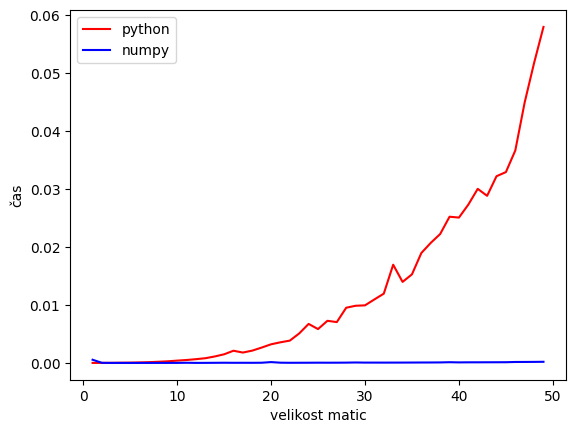

In [7]:
time_A = []
time_B = []

# velikosti matice
for radek in range(1, 50):
    # generování náhodné matice dané velikosti
    A = []
    B = []
    result = []
    for sloupec in range(radek):
        A.append(random.sample(range(-100, 100), radek))
        B.append(random.sample(range(-100, 100), radek))
        result.append([0 for _ in range(radek)])

    # rešení pomocí klasického pythonu
    start = perf_counter()
    for i in range(len(A)):
 
        for j in range(len(B[0])):
    
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    end = perf_counter()
    time_A.append(end - start)
    #print(result)

    # převedí vektorů (matic) na numpy pole
    npA = np.array(A)
    npB = np.array(B)

    # řešené pomocí numpy
    start = perf_counter()
    npresult = np.matmul(npA, npB)
    end = perf_counter()
    time_B.append(end - start)
    #print(npresult)

#graf závisloti času na velikosti matice
plt.plot(range(1, 50), time_A, 'r', label = 'python')
plt.plot(range(1, 50), time_B, 'b', label = 'numpy')
plt.legend(loc = 'upper left')
plt.xlabel('velikost matic')
plt.ylabel('čas')
plt.show()

# Určitý integrál

2.5886480102926916
2.588628632507176


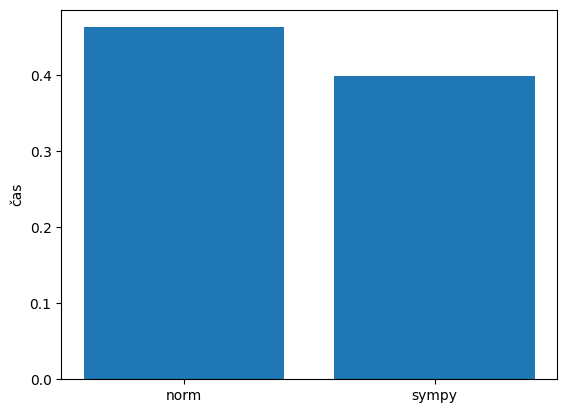

In [8]:
# počáteční a koncový bod integrálu, dx - krok pro numerický výpočet integrálu
integral = 0
a = 0
b = np.pi/4
dx = 0.00001
# funkce kterou integrujeme
def f(x):
    return np.exp(3*x) * np.sin(2*x)

# výpočet integrálu pomocí lichobeznikového pravidla
start = perf_counter()
x = a
while x < b:
    integral += dx * (f(x) + f(x+dx))/2
    x += dx
end = perf_counter()
time_A = end - start
print(integral)

# výpočet integrálu pomocí sympy
x = Symbol('x')

start = perf_counter()
integrate(exp(3*x) * sin(2*x), (x, 0, pi/4))
end = perf_counter()
time_B = end - start
print(float(integrate(exp(3*x) * sin(2*x), (x, 0, pi/4))))

# graf zobrazující čas pro daný způsob řešení
plt.bar(['norm','sympy'], [time_A, time_B])
plt.ylabel('čas')
plt.show()

# Factoriál


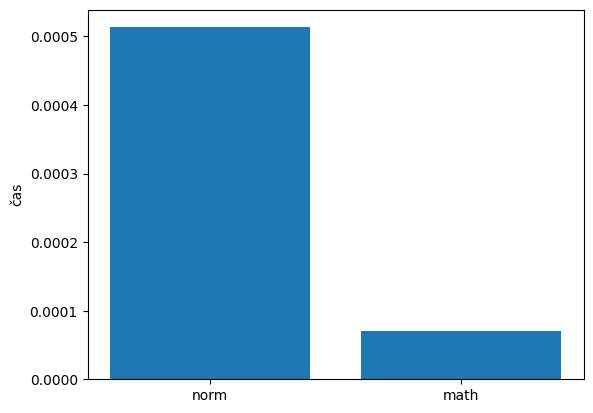

In [9]:
# výpočet faktoriálu pomocí klasického pythonu
def faktorial(n):
    if n == 0:
        return 1
    else:
        return n * faktorial(n - 1)

# fakotriál pomocí modulu math
start = perf_counter()
math.factorial(400)
end = perf_counter()
time_math = end - start

# faktoriál pomocí vytvořene funkce
start = perf_counter()
faktorial(400)
end = perf_counter()
time_norm = end - start

# graf zobrazující čas pro daný způsob řešení
plt.bar(['norm','math'], [time_norm, time_math])
plt.ylabel('čas')
plt.show()

# Derivace v bodě

In [21]:
# definice funkce
def f(x):
    return (sin(x) * exp(x)) * x**12 * cos(3*x) * log(x**3)

In [61]:
# definice derivace
def df(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)

In [62]:
# derivace pomocí vytvořené funkce
start = perf_counter()
print(df(2))
end = perf_counter()

time_norm = end - start

447095.566952266


In [63]:
# derivace pomocí sympy
x = symbols('x')

start = perf_counter()
f_prime = diff(f(x), x)

f_prime_value = f_prime.subs(x, 2)
print(float(f_prime_value))
end = perf_counter()

time_sym = end - start

447093.7630744242


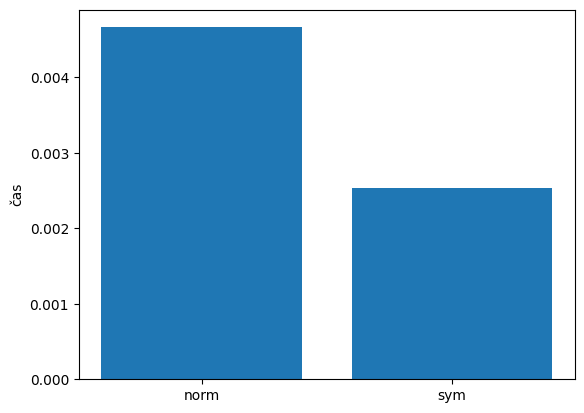

In [64]:
plt.bar(['norm','sym'], [time_norm, time_sym])
plt.ylabel('čas')
plt.show()